## Solar Radiation Analysis


#### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing the Dataset

In [2]:
train_data = pd.read_csv('SolarPrediction.csv')
train_data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


#### Data Exploration

In [3]:
train_data.shape

(32686, 11)

In [4]:
train_data.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


In [5]:
train_data.isnull().sum()

UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [7]:
train_data.columns

Index(['UNIXTime', 'Data', 'Time', 'Radiation', 'Temperature', 'Pressure',
       'Humidity', 'WindDirection(Degrees)', 'Speed', 'TimeSunRise',
       'TimeSunSet'],
      dtype='object')

In [10]:
train_data2 = train_data

In [11]:
#Add column 'month'
train_data2['month'] = pd.to_datetime(train_data2['UNIXTime'].astype(int), unit='s').dt.month

#Add column 'year'
train_data2['year'] = pd.to_datetime(train_data2['UNIXTime'].astype(int), unit='s').dt.year

train_data2.head()
#train_data2.describe()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,month,year
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,9,2016
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,9,2016
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,9,2016
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,9,2016
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,9,2016


#### Data Visualization

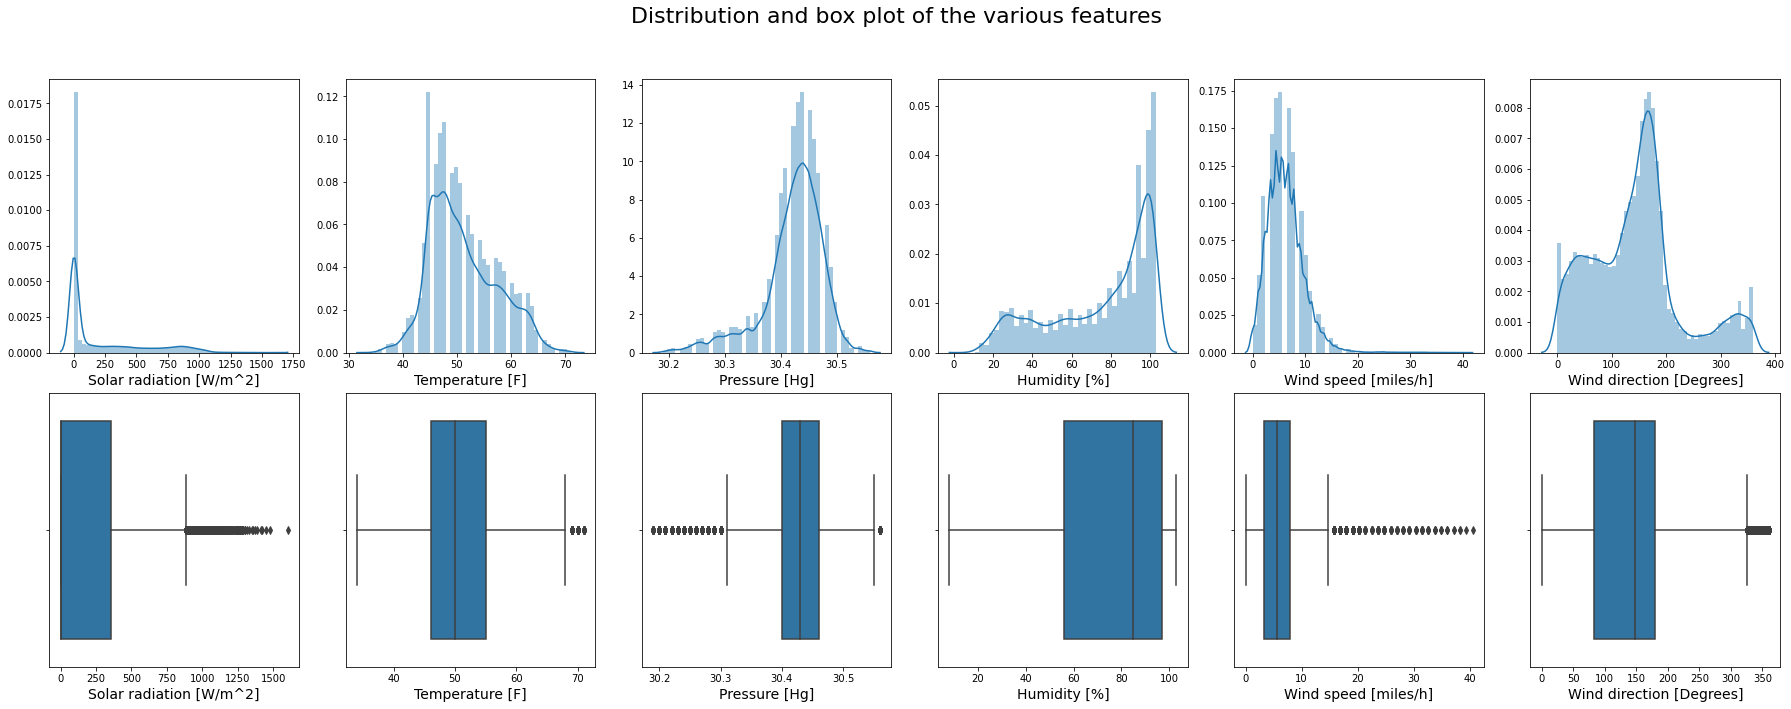

In [9]:
fig, ax = plt.subplots(nrows =2, ncols = 6, figsize = (25, 10))

sns.distplot(train_data.Radiation, ax = ax[0,0])
ax[0,0].set_xlabel('Solar radiation [W/m^2]', fontsize = 14)

sns.distplot(train_data.Temperature, ax = ax[0,1])
ax[0,1].set_xlabel('Temperature [F]', fontsize = 14)

sns.distplot(train_data.Pressure, ax = ax[0,2])
ax[0,2].set_xlabel('Pressure [Hg]', fontsize = 14)

sns.distplot(train_data.Humidity, ax = ax[0,3])
ax[0,3].set_xlabel('Humidity [%]', fontsize = 14)

sns.distplot(train_data.Speed, ax = ax[0,4])
ax[0,4].set_xlabel('Wind speed [miles/h]', fontsize = 14)

sns.distplot(train_data['WindDirection(Degrees)'], ax = ax[0,5])
ax[0,5].set_xlabel('Wind direction [Degrees]', fontsize = 14)


sns.boxplot(train_data.Radiation, ax = ax[1,0])
ax[1,0].set_xlabel('Solar radiation [W/m^2]', fontsize = 14)

sns.boxplot(train_data.Temperature, ax = ax[1,1])
ax[1,1].set_xlabel('Temperature [F]', fontsize = 14)

sns.boxplot(train_data.Pressure, ax = ax[1,2])
ax[1,2].set_xlabel('Pressure [Hg]', fontsize = 14)

sns.boxplot(train_data.Humidity, ax = ax[1,3])
ax[1,3].set_xlabel('Humidity [%]', fontsize = 14)

sns.boxplot(train_data.Speed, ax = ax[1,4])
ax[1,4].set_xlabel('Wind speed [miles/h]', fontsize = 14)

sns.boxplot(train_data['WindDirection(Degrees)'], ax = ax[1,5])
ax[1,5].set_xlabel('Wind direction [Degrees]', fontsize = 14)

fig.suptitle('Distribution and box plot of the various features', fontsize = 22)
fig.tight_layout()
fig.subplots_adjust(top=0.88)

plt.show()

##### Barplot

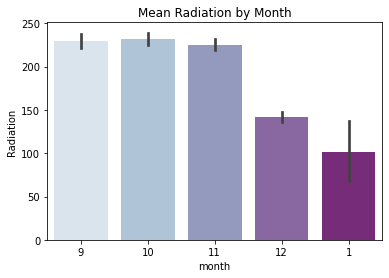

In [12]:
ax = plt.axes()
sns.barplot(x="month", y='Radiation', data=train_data2, palette="BuPu", ax = ax, order=[9,10,11,12,1])
ax.set_title('Mean Radiation by Month')
plt.show()

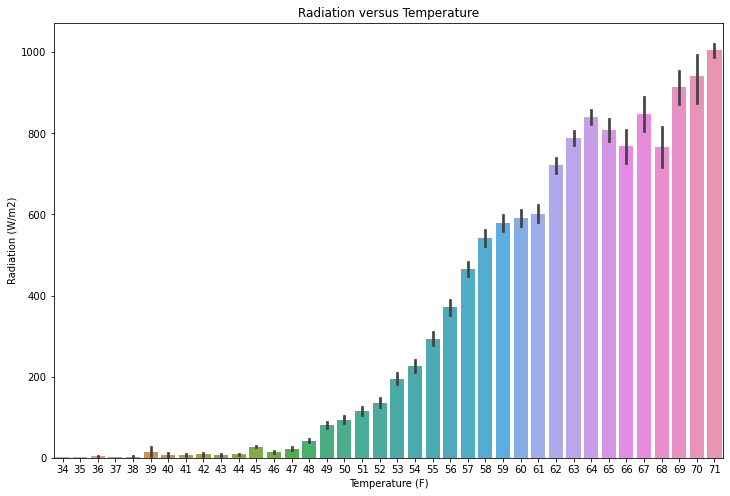

In [14]:
plt.figure(figsize=(12,8))
sns.barplot(x=train_data['Temperature'],y=train_data['Radiation'])
plt.xlabel('Temperature (F)')
plt.ylabel('Radiation (W/m2)')
plt.title('Radiation versus Temperature')
plt.show()

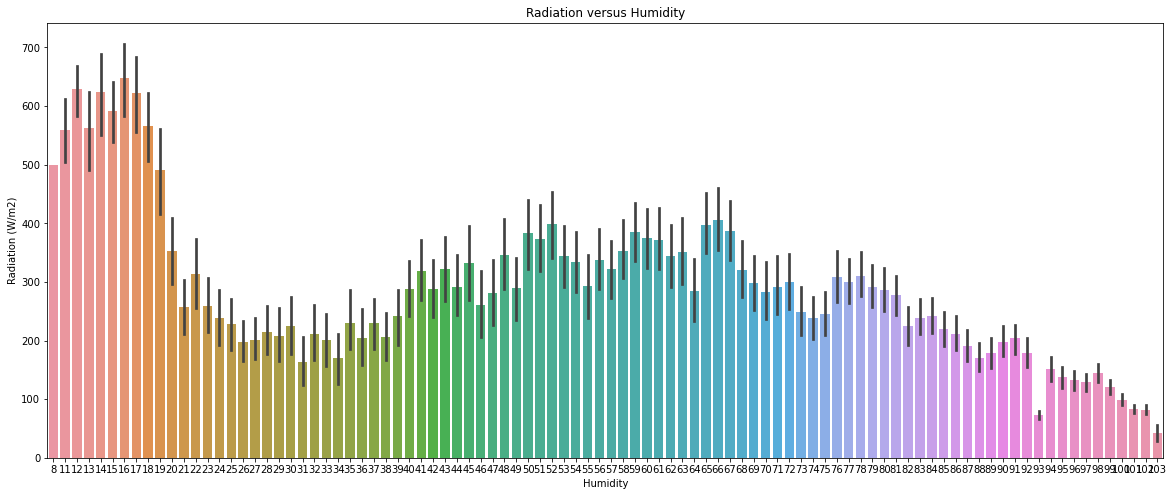

In [15]:
plt.figure(figsize=(20,8))
sns.barplot(x=train_data['Humidity'],y=train_data['Radiation'])
plt.xlabel('Humidity')
plt.ylabel('Radiation (W/m2)')
plt.title('Radiation versus Humidity')
plt.show()

In [16]:
train_data1 = train_data.iloc[:,3:9]
train_data1.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
0,1.21,48,30.46,59,177.39,5.62
1,1.21,48,30.46,58,176.78,3.37
2,1.23,48,30.46,57,158.75,3.37
3,1.21,48,30.46,60,137.71,3.37
4,1.17,48,30.46,62,104.95,5.62


In [17]:
# Dependent Column
train_data1['Radiation'].describe()

count    32686.000000
mean       207.124697
std        315.916387
min          1.110000
25%          1.230000
50%          2.660000
75%        354.235000
max       1601.260000
Name: Radiation, dtype: float64

#### Distanceplot

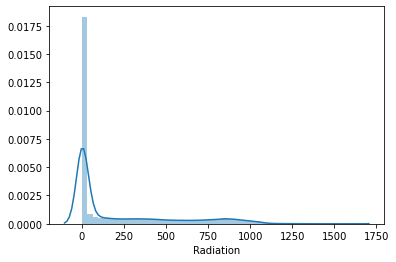

In [18]:
f, ax = plt.subplots()
sns.distplot(train_data['Radiation'])
plt.show()
#plt.xlim([1,1602])

##### Heatmap

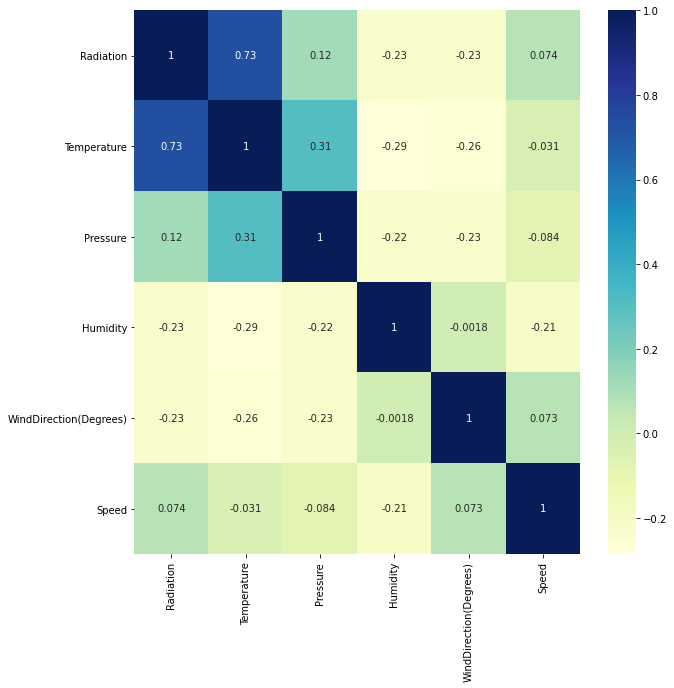

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(train_data1.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [20]:
X = train_data1.iloc[:,1:]
y = train_data1.iloc[:,0]

In [21]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

results_df = pd.DataFrame()
columns = ["Model", "MAE", "MSE", "RMSE", "R2"]

def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

def append_results(model_name, results_df, y_test, pred):
    results_append_df = pd.DataFrame(data=[[model_name, *evaluate(y_test, pred)]], columns=columns)
    results_df = results_df.append(results_append_df, ignore_index = True)
    return results_df

In [22]:
# Splitting Data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

##### LINEAR Regressor

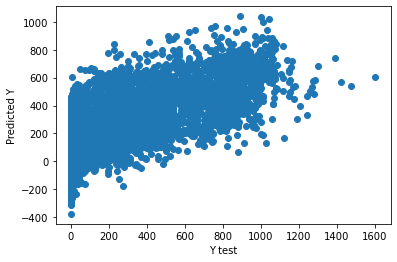

In [23]:
from sklearn.linear_model import LinearRegression
regresor= LinearRegression()
regresor.fit(X_train, y_train)
regresor_pred = regresor.predict(X_test)

plt.scatter(y_test,regresor_pred)
plt.xlabel('Y test')
plt.ylabel('Predicted Y')
plt.show()

#### Random Forest Regression Model

(array([[4.341e+03, 5.040e+02, 4.120e+02, 3.360e+02, 3.260e+02, 4.110e+02,
         1.810e+02, 2.100e+01, 4.000e+00, 2.000e+00],
        [4.123e+03, 5.880e+02, 5.490e+02, 5.020e+02, 4.800e+02, 2.740e+02,
         2.200e+01, 0.000e+00, 0.000e+00, 0.000e+00]]),
 array([1.110000e+00, 1.611250e+02, 3.211400e+02, 4.811550e+02,
        6.411700e+02, 8.011850e+02, 9.612000e+02, 1.121215e+03,
        1.281230e+03, 1.441245e+03, 1.601260e+03]),
 <a list of 2 Lists of Patches objects>)

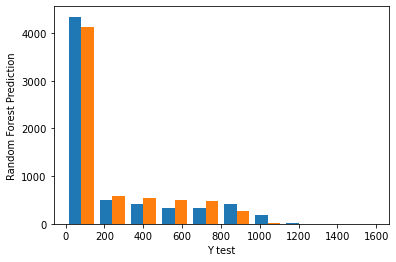

In [24]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
randomforest_pred= rf_reg.predict(X_test)

plt.xlabel('Y test')
plt.ylabel('Random Forest Prediction')
plt.hist((y_test,randomforest_pred))

In [25]:
results_df= append_results("Linear Regression",results_df,y_test,regresor_pred)
results_df

,Model,MAE,MSE,RMSE,R2
0,Linear Regression,157.743247,43013.079668,207.395949,0.568154


In [26]:
results_df= append_results("Random Forest Regression",results_df,y_test,randomforest_pred)
results_df

,Model,MAE,MSE,RMSE,R2
0,Linear Regression,157.743247,43013.079668,207.395949,0.568154
1,Random Forest Regression,89.875815,24559.470979,156.714616,0.753426


#### SVR

(array([[4.295e+03, 5.070e+02, 4.160e+02, 3.520e+02, 3.270e+02, 4.160e+02,
         1.960e+02, 2.200e+01, 5.000e+00, 2.000e+00],
        [4.154e+03, 1.178e+03, 7.590e+02, 3.640e+02, 8.300e+01, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]]),
 array([ -15.98434047,  145.74009357,  307.46452762,  469.18896167,
         630.91339572,  792.63782976,  954.36226381, 1116.08669786,
        1277.81113191, 1439.53556595, 1601.26      ]),
 <a list of 2 Lists of Patches objects>)

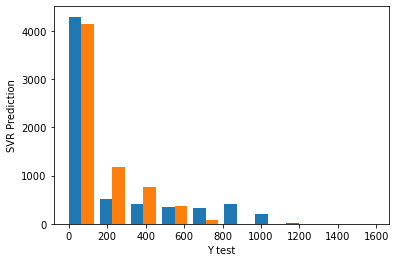

In [27]:
from sklearn.svm import SVR
solar_svr = SVR()
solar_svr.fit(X_train,y_train)
svr_pred = solar_svr.predict(X_test)

plt.xlabel('Y test')
plt.ylabel('SVR Prediction')
plt.hist((y_test,svr_pred))

In [28]:
results_df= append_results("SVR",results_df,y_test,svr_pred)
results_df

,Model,MAE,MSE,RMSE,R2
0,Linear Regression,157.743247,43013.079668,207.395949,0.568154
1,Random Forest Regression,89.875815,24559.470979,156.714616,0.753426
2,SVR,146.816992,59055.253380,243.012867,0.407092


#### Decision Tree Regression

In [29]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
dtr_pred = dtr.predict(X_test)

In [30]:
results_df= append_results("Decision Tree Regression",results_df,y_test,dtr_pred)
results_df

,Model,MAE,MSE,RMSE,R2
0,Linear Regression,157.743247,43013.079668,207.395949,0.568154
1,Random Forest Regression,89.875815,24559.470979,156.714616,0.753426
2,SVR,146.816992,59055.253380,243.012867,0.407092
3,Decision Tree Regression,110.204734,48991.145512,221.339435,0.508135


##### Adaboost Regression

In [31]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
ada_reg= AdaBoostRegressor(RandomForestRegressor())
ada_reg.fit(X_train,y_train)
ada_pred = ada_reg.predict(X_test)

(array([[4.341e+03, 5.040e+02, 4.120e+02, 3.360e+02, 3.260e+02, 4.110e+02,
         1.810e+02, 2.100e+01, 4.000e+00, 2.000e+00],
        [4.062e+03, 6.510e+02, 5.410e+02, 5.120e+02, 4.850e+02, 2.710e+02,
         1.600e+01, 0.000e+00, 0.000e+00, 0.000e+00]]),
 array([1.110000e+00, 1.611250e+02, 3.211400e+02, 4.811550e+02,
        6.411700e+02, 8.011850e+02, 9.612000e+02, 1.121215e+03,
        1.281230e+03, 1.441245e+03, 1.601260e+03]),
 <a list of 2 Lists of Patches objects>)

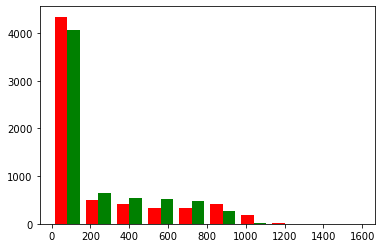

In [32]:
plt.hist((y_test,ada_pred), color=['red','green'])

In [33]:
results_df= append_results("AdaBoost Regression",results_df,y_test,ada_pred)
results_df

,Model,MAE,MSE,RMSE,R2
0,Linear Regression,157.743247,43013.079668,207.395949,0.568154
1,Random Forest Regression,89.875815,24559.470979,156.714616,0.753426
2,SVR,146.816992,59055.253380,243.012867,0.407092
3,Decision Tree Regression,110.204734,48991.145512,221.339435,0.508135
4,AdaBoost Regression,102.131849,25034.934863,158.224318,0.748652


##### Gradient Boosting Regression

In [34]:
from sklearn.ensemble import GradientBoostingRegressor
gr_reg= GradientBoostingRegressor()
gr_reg.fit(X_train,y_train)
gr_pred = gr_reg.predict(X_test)

(array([[4.149e+03, 5.240e+02, 4.510e+02, 3.840e+02, 3.250e+02, 4.410e+02,
         2.320e+02, 2.400e+01, 6.000e+00, 2.000e+00],
        [3.572e+03, 1.025e+03, 5.410e+02, 5.270e+02, 5.380e+02, 3.290e+02,
         6.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]]),
 array([ -67.25811545,   99.59369609,  266.44550764,  433.29731918,
         600.14913073,  767.00094227,  933.85275382, 1100.70456536,
        1267.55637691, 1434.40818845, 1601.26      ]),
 <a list of 2 Lists of Patches objects>)

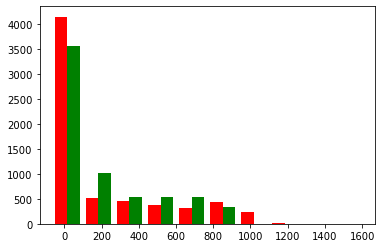

In [35]:
plt.hist((y_test,gr_pred), color=['red','green'])

In [36]:
results_df= append_results("Gradient Regression",results_df,y_test,gr_pred)
results_df

,Model,MAE,MSE,RMSE,R2
0,Linear Regression,157.743247,43013.079668,207.395949,0.568154
1,Random Forest Regression,89.875815,24559.470979,156.714616,0.753426
2,SVR,146.816992,59055.253380,243.012867,0.407092
3,Decision Tree Regression,110.204734,48991.145512,221.339435,0.508135
4,AdaBoost Regression,102.131849,25034.934863,158.224318,0.748652
5,Gradient Regression,109.764412,30173.967224,173.706555,0.697057


##### KNeighbors Regressor

(array([[4.341e+03, 5.040e+02, 4.120e+02, 3.360e+02, 3.260e+02, 4.110e+02,
         1.810e+02, 2.100e+01, 4.000e+00, 2.000e+00],
        [4.127e+03, 6.930e+02, 4.610e+02, 5.270e+02, 5.510e+02, 1.790e+02,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]]),
 array([1.110000e+00, 1.611250e+02, 3.211400e+02, 4.811550e+02,
        6.411700e+02, 8.011850e+02, 9.612000e+02, 1.121215e+03,
        1.281230e+03, 1.441245e+03, 1.601260e+03]),
 <a list of 2 Lists of Patches objects>)

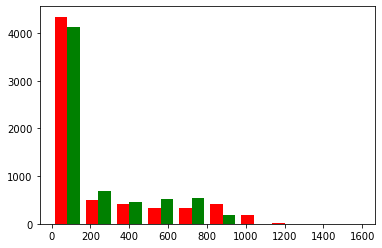

In [37]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=25)
knn_reg.fit(X_train,y_train)
knn_pred = knn_reg.predict(X_test)

plt.hist((y_test,knn_pred), color=['red','green'])

In [38]:
results_df= append_results("KNN",results_df,y_test,knn_pred)
results_df

,Model,MAE,MSE,RMSE,R2
0,Linear Regression,157.743247,43013.079668,207.395949,0.568154
1,Random Forest Regression,89.875815,24559.470979,156.714616,0.753426
2,SVR,146.816992,59055.253380,243.012867,0.407092
3,Decision Tree Regression,110.204734,48991.145512,221.339435,0.508135
4,AdaBoost Regression,102.131849,25034.934863,158.224318,0.748652
5,Gradient Regression,109.764412,30173.967224,173.706555,0.697057
6,KNN,110.457334,32824.128450,181.174304,0.670450
